In [320]:
import pandas as pd
import numpy as np

In [321]:
column_names_df = pd.read_csv('data/lending_club_data_dictionary.csv', delimiter=',', encoding='latin-1')
column_names_df = column_names_df.dropna(axis=1, how='all')
column_names_df = column_names_df.dropna(subset=['LoanStatNew'], how='all')
# column_names_df

In [322]:
loan_stat_df = pd.read_csv('data/LoanStats3a.csv',low_memory=False, delimiter=',', skiprows=1)#, encoding='latin-1')
print(f"original csv rows and columns: {loan_stat_df.shape}")
loan_stat_df = loan_stat_df.dropna(axis=1, how='all')   # dropping columns that does not contain values in any row
loan_stat_df = loan_stat_df.drop('id', axis=1)     # no values present in this column, except last two with text data
print(f"drop all nan columns shape: {loan_stat_df.shape}")
loan_stat_df = loan_stat_df.dropna(how='all')      # dropping rows having all nan values
print(f"drop all nan rows shape: {loan_stat_df.shape}")
print(f"All columns: [{loan_stat_df.columns}]")

original csv rows and columns: (42538, 144)
drop all nan columns shape: (42538, 62)
drop all nan rows shape: (42535, 62)
All columns: [Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
  

In [323]:
loan_stat_df.shape

(42535, 62)

In [324]:
loan_stat_df.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term
count,42535.000,42535.000,42535.000,42535.000,42531.000,42535.000,42506.000,42506.000,15609.000,3651.000,42506.000,42506.000,42535.000,42506.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42390.000,42535.000,42506.000,42390.000,42506.000,41170.000,42430.000,161.000,161.000,161.000
mean,11089.723,10821.586,10140.329,322.623,69136.556,13.373,0.152,1.081,35.018,59.176,9.344,0.058,14297.861,22.124,0.000,0.000,12020.918,11313.365,9675.676,2239.981,1.517,103.743,14.519,2613.300,0.000,1.000,0.000,0.000,0.143,0.045,0.000,4253.081,49.922,1.261
std,7410.938,7146.915,7131.529,208.927,64096.350,6.726,0.512,1.527,22.418,47.145,4.496,0.246,22018.441,11.593,0.000,0.000,9094.877,9038.593,7105.750,2585.057,7.830,740.893,162.964,4385.048,0.000,0.000,0.010,0.000,29.360,0.209,0.005,3117.891,15.526,4.130
min,500.000,500.000,0.000,15.670,1896.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,193.290,10.690,0.000
25%,5200.000,5000.000,4950.000,165.520,40000.000,8.200,0.000,0.000,17.000,0.000,6.000,0.000,3635.000,13.000,0.000,0.000,5465.951,4793.225,4400.000,657.100,0.000,0.000,0.000,211.070,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1800.000,40.000,0.000
50%,9700.000,9600.000,8500.000,277.690,59000.000,13.470,0.000,1.000,33.000,85.000,9.000,0.000,8821.000,20.000,0.000,0.000,9682.263,8956.240,8000.000,1339.160,0.000,0.000,0.000,528.530,0.000,1.000,0.000,0.000,0.000,0.000,0.000,3498.700,49.980,0.000
75%,15000.000,15000.000,14000.000,428.180,82500.000,18.680,0.000,2.000,51.000,101.000,12.000,0.000,17251.000,29.000,0.000,0.000,16428.525,15544.950,13499.995,2803.090,0.000,0.000,0.000,3170.220,0.000,1.000,0.000,0.000,0.000,0.000,0.000,5684.800,60.640,0.000
max,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,13.000,33.000,120.000,129.000,47.000,5.000,1207359.000,90.000,0.000,0.000,58886.473,58563.680,35000.020,23886.470,209.000,29623.350,7002.190,36115.200,0.000,1.000,1.000,0.000,6053.000,2.000,1.000,14798.200,92.740,24.000


In [325]:
pd.set_option('display.max_rows', None)
null_counts = loan_stat_df.isnull().sum()#.to_frame()
null_counts_df = null_counts.to_frame()
null_counts_df

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,2626
emp_length,1112


In [326]:
nan_threshold = 10000
cols_to_drop = [col for col in loan_stat_df.columns if null_counts[col] > nan_threshold]
print(f"number of columns with null values count greater than 10000: {len(cols_to_drop)}")
# drop the columns
loan_stat_df.drop(cols_to_drop, axis=1, inplace=True)

# print the resulting dataframe
print(null_counts.shape)
print(f"shape of dataframe after dropping null valued columns: {loan_stat_df.shape}")

number of columns with null values count greater than 10000: 10
(62,)
shape of dataframe after dropping null valued columns: (42535, 52)


In [327]:
pd.set_option('display.max_columns', None)
loan_stat_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,n,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,f,0.000,0.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N


In [328]:
loan_stat_df.nunique().to_frame() #number of unique values in all columns

,0
loan_amnt,898
funded_amnt,1051
funded_amnt_inv,9338
term,2
int_rate,394
installment,16459
grade,7
sub_grade,35
emp_title,30658
emp_length,11


In [329]:
# print(loan_stat_df['debt_settlement_flag'].value_counts())
# print(loan_stat_df['tax_liens'].value_counts())
# print(loan_stat_df['pub_rec_bankruptcies'].value_counts())
# print(loan_stat_df['delinq_amnt'].value_counts())
# print(loan_stat_df['acc_now_delinq'].value_counts())

In [330]:
# print(loan_stat_df['delinq_2yrs'].value_counts())

In [331]:
# print(loan_stat_df['purpose'].value_counts())
# print(loan_stat_df['verification_status'].value_counts())
# print(loan_stat_df['home_ownership'].value_counts())

In [332]:
print(loan_stat_df['grade'].value_counts())
print(loan_stat_df['term'].value_counts())

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
 36 months    31534
 60 months    11001
Name: term, dtype: int64


In [333]:
loan_stat_df.loc[loan_stat_df['loan_status'] == "Does not meet the credit policy. Status:Fully Paid", 'loan_status_altered'] = 'Fully Paid'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Does not meet the credit policy. Status:Charged Off", 'loan_status_altered'] = 'Charged Off'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Charged Off", 'loan_status_altered'] = 'Charged Off'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Fully Paid", 'loan_status_altered'] = 'Fully Paid'
print(loan_stat_df['loan_status_altered'].value_counts())
print(loan_stat_df.shape)
loan_stat_df.head()

Fully Paid     36104
Charged Off     6431
Name: loan_status_altered, dtype: int64
(42535, 53)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,n,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,f,0.000,0.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid


In [334]:
loan_stat_df = loan_stat_df.drop(columns=['pymnt_plan', 'initial_list_status','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths','hardship_flag'])
print(f"shape of dataframe after dropping single valued columns: {loan_stat_df.shape}")
loan_stat_df.head()

shape of dataframe after dropping single valued columns: (42535, 44)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


# Handling missing values in above columns

In [335]:
pd.set_option('display.max_rows', None)
null_counts = loan_stat_df.isnull().sum()#.to_frame()
na_counts = loan_stat_df.isna().sum()#.to_frame()
uniq_count_df = loan_stat_df.nunique().to_frame()
null_counts_df = null_counts.to_frame()
na_counts_df = na_counts.to_frame()
df_concat = pd.concat([null_counts_df, na_counts_df, uniq_count_df], axis=1)
df_concat.columns = ['null_counts', 'na_counts', 'uniq_count']
df_concat_filtered = df_concat[df_concat['null_counts'] > 0]
df_concat_sorted =df_concat.sort_values('uniq_count', ascending=False)
display(df_concat_sorted, df_concat_filtered)
print(df_concat.shape)

,null_counts,na_counts,uniq_count
total_pymnt,0,0,42366
total_pymnt_inv,0,0,40102
total_rec_int,0,0,37462
last_pymnt_amnt,0,0,37261
emp_title,2626,2626,30658
revol_bal,0,0,22709
title,13,13,21264
installment,0,0,16459
funded_amnt_inv,0,0,9338
total_rec_prncp,0,0,7691


,null_counts,na_counts,uniq_count
emp_title,2626,2626,30658
emp_length,1112,1112,11
annual_inc,4,4,5597
title,13,13,21264
delinq_2yrs,29,29,12
earliest_cr_line,29,29,530
inq_last_6mths,29,29,28
open_acc,29,29,44
pub_rec,29,29,6
revol_util,90,90,1119


(44, 3)


### replacing missing values in annual income column by mean annual income when grouped by state

In [336]:
# group by state and compute the mean annual income
grouped = loan_stat_df.groupby('addr_state')['annual_inc'].transform(lambda x: x.fillna(x.mean()))

# update the dataframe with the new values
loan_stat_df['annual_inc'] = grouped

# display the updated dataframe
# display(loan_stat_df)

## Q2: average annual income and number of loan applicants by state

In [337]:
# group by state and compute the mean annual income and row counts
grouped_app = loan_stat_df.groupby('addr_state').agg({'annual_inc': 'mean', 'addr_state': 'count'})

# rename columns for clarity
grouped_app = grouped_app.rename(columns={'annual_inc': 'Avg Annual Income', 'addr_state': 'Row Counts'})

# display the grouped dataframe
display(grouped_app)
print(grouped_app.shape)

,Avg Annual Income,Row Counts
addr_state,,
AK,78902.431,86
AL,63275.836,484
AR,59946.405,261
AZ,67799.876,933
CA,72221.439,7429
CO,66823.790,857
CT,75707.016,816
DC,77794.438,224
DE,69437.426,136


(50, 2)


In [338]:
grouped_app['Row Counts'].sum()

42535

### Q3. annual income of applicants from West Virginia and New Mexico.

In [339]:
grouped_app_wv_nm = grouped_app.loc[['WV','NM']]
display(grouped_app_wv_nm)

,Avg Annual Income,Row Counts
addr_state,,
WV,54235.403,187
NM,81936.604,205


#### Q3.a: histogram

In [340]:
loan_stat_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


In [341]:
df_wv_inc = loan_stat_df.loc[loan_stat_df['addr_state']=='WV']
WV_inc_list = list(df_wv_inc['annual_inc'])
WV_inc_list_int = [int(x) for x in WV_inc_list]
df_nm_inc = loan_stat_df.loc[loan_stat_df['addr_state']=='NM']
NM_inc_list = list(df_nm_inc['annual_inc'])
NM_inc_list_int = [int(x) for x in NM_inc_list]

In [342]:
print(max(WV_inc_list_int))
print(max(NM_inc_list_int))
NM_inc_list_int.sort(reverse=True)
print(NM_inc_list_int)

170000
3900000
[3900000, 470000, 415000, 240000, 240000, 150000, 145000, 138000, 125000, 125000, 125000, 120000, 110000, 109200, 105996, 105000, 105000, 105000, 100000, 100000, 98000, 97000, 96384, 96000, 96000, 94000, 92500, 92052, 92000, 92000, 92000, 91100, 90000, 90000, 90000, 90000, 90000, 89004, 88975, 87000, 85000, 85000, 83004, 83000, 80500, 80000, 79800, 78000, 78000, 78000, 78000, 78000, 77000, 76000, 76000, 75000, 73200, 72000, 72000, 70000, 70000, 70000, 68004, 67000, 66841, 66000, 65500, 65061, 65061, 65000, 65000, 65000, 64999, 64500, 64140, 62004, 62004, 62000, 61700, 61000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 59436, 58516, 58000, 57000, 56700, 56004, 56004, 56000, 55200, 55000, 55000, 55000, 54000, 53004, 53000, 53000, 52680, 52416, 52000, 52000, 52000, 52000, 51500, 50004, 50000, 50000, 50000, 49600, 49500, 48996, 48500, 48000, 48000, 48000, 47000, 46800, 46551, 46000, 46000, 45996, 45600, 45378, 45000, 45000, 43596, 42996, 42600, 4250

In [343]:
# summary = display(pd.Series(NM_inc_list_int).describe())
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# print(summary)

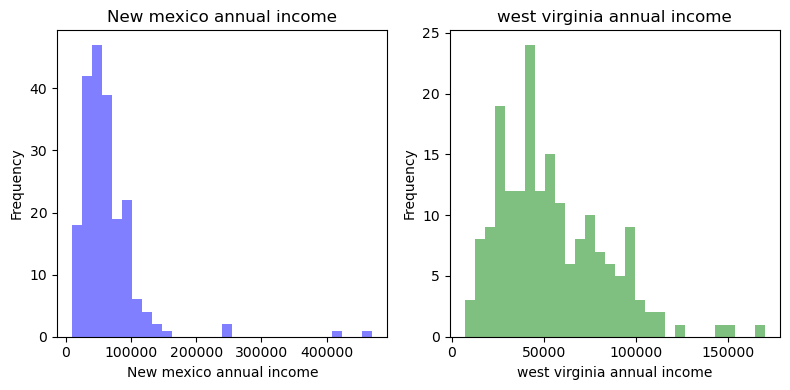

In [353]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
axs[0].hist(NM_inc_list_int[1:], bins=30, alpha=0.5, color='blue')
axs[0].set_title('New mexico annual income')
axs[0].set_xlabel('New mexico annual income')
axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(WV_inc_list_int, bins=30, alpha=0.5, color='green')
axs[1].set_title('west virginia annual income')
axs[1].set_xlabel('west virginia annual income')
axs[1].set_ylabel('Frequency')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
loan_amnt	funded_amnt

In [12]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [78]:
fig = px.box(loan_stat_df, 
             x="title",  
             color="loan_status_altered", 
             title="loan status Based on Occupation", 
             color_discrete_map={'Charged Off':'red',
                                 'Fully Paid':'green'})
fig.show()

In [14]:
fig = px.box(loan_stat_df, 
             x="home_ownership",  
             color="loan_status_altered", 
             title="loan status Based on Occupation", 
             color_discrete_map={'Charged Off':'red',
                                 'Fully Paid':'green'})
fig.show()

In [15]:
fig = px.box(loan_stat_df, 
             x="annual_inc",  
             color="loan_status_altered", 
             title="loan status Based on Occupation", 
             color_discrete_map={'Charged Off':'red',
                                 'Fully Paid':'green'})
fig.show()

In [50]:
fig = px.box(loan_stat_df, 
             x="grade",  
             color="loan_status_altered", 
             title="loan status Based on Occupation", 
             color_discrete_map={'Charged Off':'red',
                                 'Fully Paid':'green'})
fig.show()